In [3]:
from astropy.io import fits
from glob import glob
import numpy as np
import sys
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import healpy as hp

% matplotlib inline 

In [4]:
files = np.sort(glob('/home/tcox/data/HERA_data/2458042/HERA_imaging/IDR2-1_run_3.1/imgs/*.fits'))
HDUS = []
for f in files:
    HDUS.append(fits.open(f))

In [5]:
flux = []
err = 5
theta = []
for HDU,f in zip(HDUS,files):
    # Read in file information
    fits_info = HDU[0].header
    ax1        = fits_info['NAXIS1']
    ax2        = fits_info['NAXIS2']
    units      = fits_info['BUNIT']
    c_ra       = fits_info['OBSRA']
    c_dec      = fits_info['OBSDEC']
    pix_size   = fits_info['CDELT2']
    c_pix1     = fits_info['CRPIX1']
    c_pix2     = fits_info['CRPIX2']
    
    # Convert a position to pixel values
    w = WCS(f)
    i,j = w.all_world2pix(50.67412,-37.208200,0,0,0)[:2]
    
    # Read in data
    data = HDU[0].data
    data = np.flip(data[0][0],axis=0)
    if ax1-err > i > err and ax2-err > j > err:
        i = int(i)
        j = int(ax2-j)
        theta.append(c_ra-50.67412)
        flux.append(data[j-5:j+5,i-5:i+5].max())

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

In [6]:
flux = np.array(flux)
norm_flux = flux/flux.max()

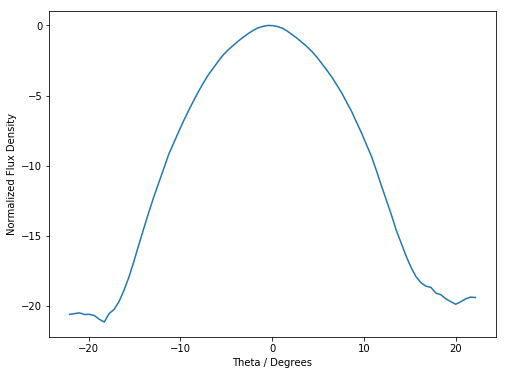

In [7]:
plt.figure(figsize=(8,6))
plt.ylabel(r'Normalized Flux Density')
plt.xlabel(r'Theta / Degrees')
plt.plot(theta,10*np.log10(norm_flux))

In [8]:
filename = 'healpix_beam.fits'
beam_E = fits.getdata(filename, extname='BEAM_E')
nside = hp.npix2nside(beam_E.shape[0])
freqs = fits.getdata(filename, extname='FREQS')
freqs = freqs[50:150]
freqs

array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
       155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
       166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176.,
       177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
       188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
       199.])

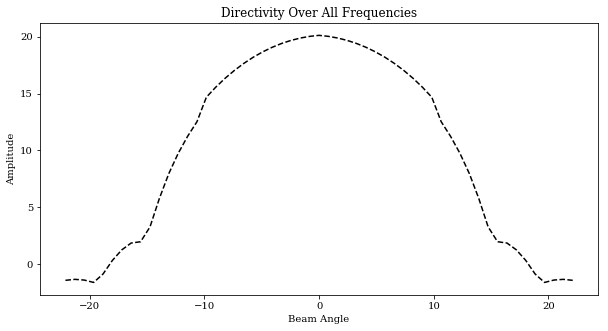

In [14]:
# Loop over all frequencies
n = 28
m_theta = np.linspace(0,np.deg2rad(theta[-1]),n)
tot = np.zeros(n)
for freq in freqs:
    ind = np.where(freqs == freq)[0][0]
    data = beam_E[:,ind]
    phi0 = np.deg2rad(-37.208200+30.7)
    vals0 = hp.ang2pix(nside,m_theta,phi0)
    plt0 = 10*np.log10(data[vals0])
    tot += plt0

tot /= len(freqs)

m_theta = np.concatenate([-np.flip(m_theta,axis=0),m_theta])
tot = np.concatenate([np.flip(tot,axis=0),tot])

plt.rc('font', family='serif')
plt.figure(figsize=(10,5))
plt.title('Directivity Over All Frequencies')
plt.xlabel('Beam Angle')
plt.ylabel('Amplitude')
plt.plot(np.rad2deg(m_theta),tot,'k--',label=(r'$\alpha$ = ' + str(phi0)))
plt.show()

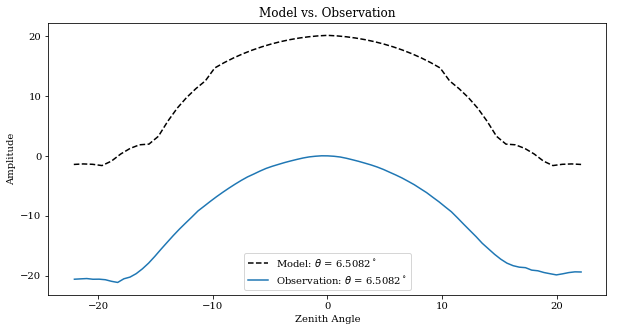

In [17]:

plt.figure(figsize=(10,5))

plt.plot(np.rad2deg(m_theta),tot,'k--',label=(r'Model: $\theta$ = ' + str(37.208200-30.7) + r'$^\circ$'))
plt.plot(theta,10*np.log10(norm_flux),label=(r'Observation: $\theta$ = ' + str(37.208200-30.7) + r'$^\circ$'))
plt.title('Model vs. Observation')
plt.xlabel('Zenith Angle')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

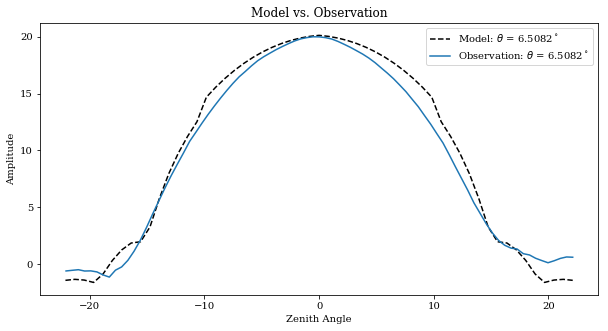

In [19]:
plt.figure(figsize=(10,5))

plt.plot(np.rad2deg(m_theta),tot,'k--',label=(r'Model: $\theta$ = ' + str(37.208200-30.7) + r'$^\circ$'))
plt.plot(theta,10*np.log10(norm_flux)+20,label=(r'Observation: $\theta$ = ' + str(37.208200-30.7) + r'$^\circ$'))
plt.title('Model vs. Observation')
plt.xlabel('Zenith Angle')
plt.ylabel('Amplitude')
plt.legend()
plt.show()